## 질병관리본부 메인페이지 워드클라우드 (4.27일)

In [1]:
import pandas as pd
import lxml.html
import requests

In [2]:
res = requests.get('http://ncov.mohw.go.kr/')

In [3]:
root = lxml.html.fromstring(res.text)

In [4]:
content = root.cssselect('[class="wrap nj"]')[0].text_content()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [6]:
tdm = cv.fit_transform([content]).toarray()

In [7]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [8]:
df.sort_values('freq',ascending=False)

,word,freq
397,확진자,36
203,대비,19
345,증감,19
322,전국대비,18
248,비율누적,18
...,...,...
147,격리해제25명사망자0명10만명당,1
146,격리해제143명사망자0명10만명당,1
145,격리해제123명사망자0명10만명당,1
144,격리해제116명사망자3명10만명당,1


In [9]:
from wordcloud import WordCloud

In [10]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

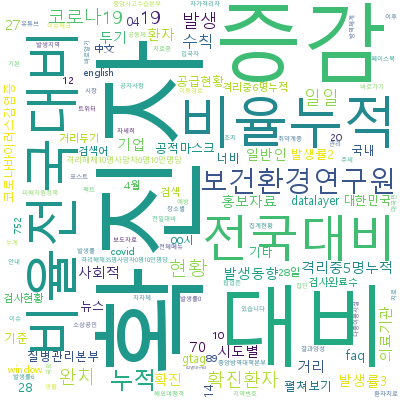

In [11]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',width=400, height=400, background_color='white',)

wc.fit_words(frequencies)

wc.to_image()

## 질병관리본부 최신브리핑 워드클라우드 (4.27일)

In [12]:
res = requests.get('http://ncov.mohw.go.kr/tcmBoardView.do?contSeq=354238')
root = lxml.html.fromstring(res.text)
content = root.cssselect('[class="bvc_txt"]')[0].text_content()

In [13]:
cv = CountVectorizer()

tdm = cv.fit_transform([content]).toarray()

df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

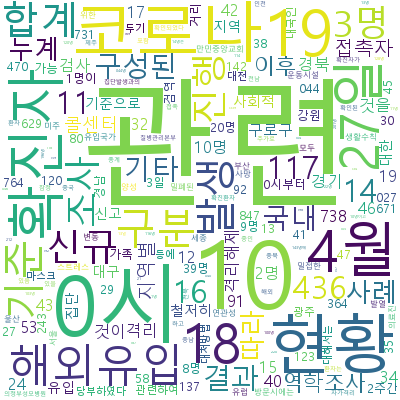

In [14]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',width=400, height=400, background_color='white',)

wc.fit_words(frequencies)

wc.to_image()

## 뉴스기사 워드클라우드

In [15]:
res = requests.get('https://www.yna.co.kr/view/AKR20200427051451017?input=1195m')
root = lxml.html.fromstring(res.text)
content = root.cssselect('[class="story-news article"]')[0].text_content()

In [16]:
cv = CountVectorizer()

tdm = cv.fit_transform([content]).toarray()

df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

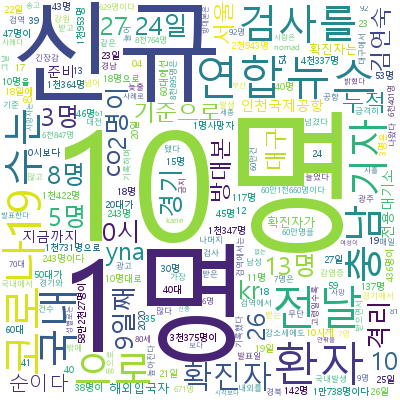

In [17]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',width=400, height=400, background_color='white',)

wc.fit_words(frequencies)

wc.to_image()

## 데이터 표 스크랩

In [18]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [19]:
browser = webdriver.Chrome('E:/tj/jupyter_notebook/chromedriver.exe')
browser.get("http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=11&ncvContSeq=&contSeq=&board_id=&gubun=")
 
result_html = browser.page_source
result_soup = BeautifulSoup(result_html, 'html.parser')
tags = result_soup.find_all("div", attrs={"class":"data_table"})[-1]
Time = result_soup.find_all("span", attrs={"class":"title_info"})[0]
browser.close()

In [20]:
#!pip install html_table_parser

In [21]:
from html_table_parser import parser_functions as parser
html_table = parser.make2d(tags)

In [22]:
df=pd.DataFrame(html_table[1:], columns=html_table[0])

In [23]:
df

,구분,확진자(%),사망자(%),치명률(%)
0,80 이상,485 (4.51),116 (47.54),23.92
1,70-79,709 (6.59),73 (29.92),10.3
2,60-69,"1,348 (12.54)",35 (14.34),2.6
3,50-59,"1,955 (18.18)",15 (6.15),0.77
4,40-49,"1,423 (13.23)",3 (1.23),0.21
5,30-39,"1,154 (10.73)",2 (0.82),0.17
6,20-29,"2,948 (27.42)",0 (0.00),-
7,10-19,590 (5.49),0 (0.00),-
8,0-9,140 (1.3),0 (0.00),-


In [24]:
#숫자로 변환
for i in range(9):
    df['확진자(%)'][i] = df['확진자(%)'][i].split('\xa0')[0].replace(',','')
    df['사망자(%)'][i] = df['사망자(%)'][i].split('\xa0')[0].replace(',','')


In [25]:
import matplotlib.pyplot as plt  

### 나이 별 확진자

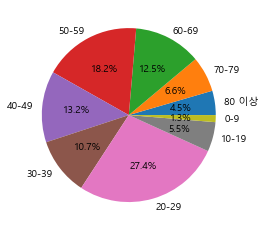

In [26]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(df['확진자(%)'].astype('int'),labels=df['구분'],autopct='%0.1f%%')
plt.show()

### 나이 별 사망자

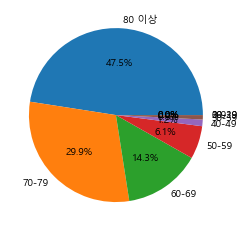

In [27]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(df['사망자(%)'].astype('int'),labels=df['구분'],autopct='%0.1f%%')
plt.show()

## 형태소 처리

In [28]:
import requests,operator, glob2
from datetime import datetime


import nltk
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/gulim.ttc").get_name()
rc('font', family=font_name)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from konlpy.tag import Hannanum
H = Hannanum()

In [29]:
#형태소 처리 함수
def analyze(content):
    nouns=H.nouns(str(content))

    # 더미데이터 제거
    trash=["조선","연합뉴스","일보","중앙","기자","뉴스","헤럴드경제",'명','수','종합','속보','코']
    for i in trash:
        for j in nouns:
            if i==j:
                nouns.remove(i)

    ko=nltk.Text(nouns,name="분석")

    #ranking이라는 변수를 사전형으로 변경
    ranking=ko.vocab().most_common(150)
    tmpData=dict(ranking)

    # 워드클라우드 설정
    wordcloud=WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',width=400, height=400,
                        relative_scaling=0.2,background_color="white",).generate_from_frequencies(tmpData)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


## 뉴스기사

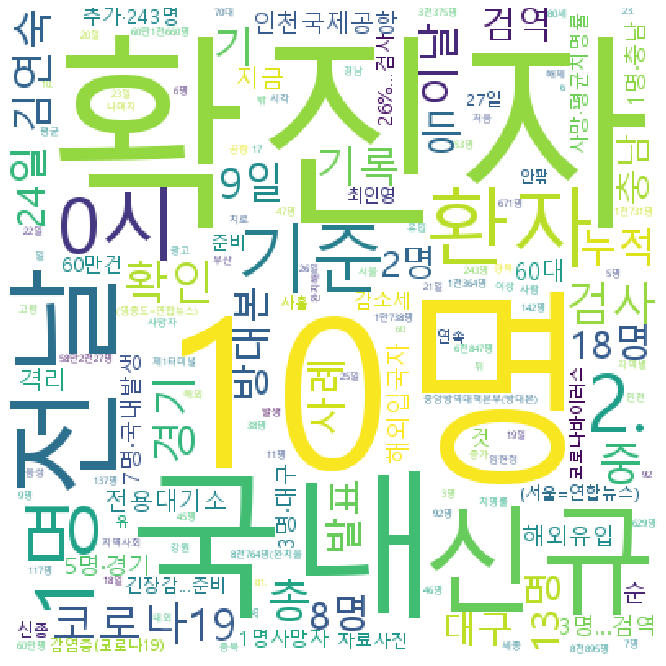

In [30]:
analyze(content)

## 네이버뉴스기사제목 클롤링 후 시각화
- 네이버 코로나19 검색한 주소에서 뉴스 기사를 크롤링

In [31]:
import time

In [32]:
browser = webdriver.Chrome('E:/tj/jupyter_notebook/chromedriver.exe')
browser.get('https://search.naver.com/search.naver?where=news&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sm=tab_srt&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so%3Ar%2Cp%3Aall%2Ca%3Aall&mynews=0&refresh_start=0&related=0')
text = []
for i in range(1,11):
    browser.find_element_by_xpath('//*[@id="main_pack"]/div[2]/div[2]/a[%s]'%i).click()
    result_html = browser.page_source
    result_soup = BeautifulSoup(result_html, 'html.parser')
    article = result_soup.find_all("a", attrs={"class":"_sp_each_title"})
    time.sleep(2)
    for head in article:
        text.append(head.get_text())

text = str(text).replace('"','').replace("'","")
text = str(text).replace('[','').replace("]","")
browser.close()

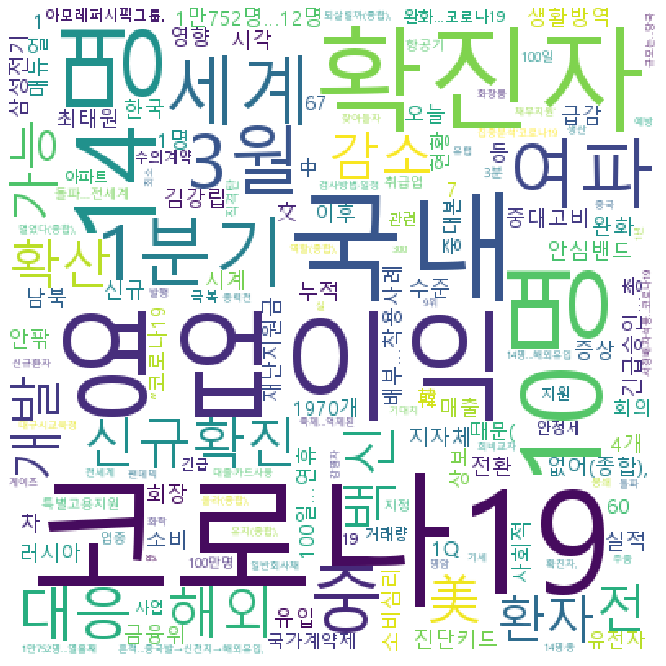

In [33]:
analyze(text)